In [29]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline
df = pd.read_csv("DataFiles/CreditCard_train.csv",header = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
ID                            24000 non-null int64
LIMIT_BAL                     24000 non-null int64
SEX                           24000 non-null int64
EDUCATION                     24000 non-null int64
MARRIAGE                      24000 non-null int64
AGE                           24000 non-null int64
PAY_0                         24000 non-null int64
PAY_2                         24000 non-null int64
PAY_3                         24000 non-null int64
PAY_4                         24000 non-null int64
PAY_5                         24000 non-null int64
PAY_6                         24000 non-null int64
BILL_AMT1                     24000 non-null int64
BILL_AMT2                     24000 non-null int64
BILL_AMT3                     24000 non-null int64
BILL_AMT4                     24000 non-null int64
BILL_AMT5                     24000 non-null int64
BILL_AMT6               

In [30]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3644,3645,30000,1,2,1,34,2,0,0,0,...,27104,28616,29102,1750,1800,1118,2100,1100,0,0
326,327,220000,2,2,1,41,-1,2,2,-1,...,950,475,325,325,0,950,0,325,325,1
22779,22780,350000,2,1,1,41,-2,-2,-2,-2,...,17321,-22,4443,15069,3116,17414,0,4465,9434,0
22067,22068,50000,2,1,2,26,-1,-1,-1,-1,...,1713,651,646,651,1072,1713,651,646,651,1
12750,12751,20000,1,3,2,23,1,2,0,0,...,16197,18932,18271,0,2000,1780,3000,0,0,1


In [31]:
# undocumented -2 PAY
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,-0.003125,-0.12350,-0.154750,-0.211667,-0.252917,-0.278000
std,1.123425,1.20058,1.204033,1.166549,1.136993,1.158169
min,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000


In [32]:
# negative bill statements should be investigate
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [33]:
df = df.rename(columns={'defaultpaymentnextmonth': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
df.SEX.value_counts()

2    15078
1     8922
Name: SEX, dtype: int64

In [35]:
df['MARRIAGE'].value_counts()

2    12877
1    10813
3      269
0       41
Name: MARRIAGE, dtype: int64

In [36]:
df.EDUCATION.value_counts()

2    11360
1     8443
3     3850
5      207
4       92
6       37
0       11
Name: EDUCATION, dtype: int64

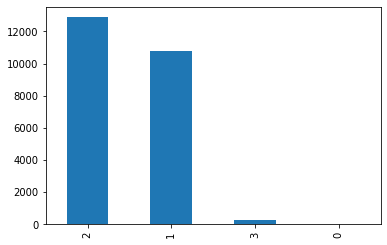

In [37]:
df.MARRIAGE.value_counts().plot(kind = 'bar')
# or can even do it horizontally by df.EDUCATION.value_counts().plot(kind = "barh")

In [38]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

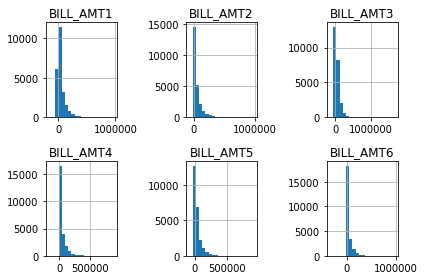

In [39]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

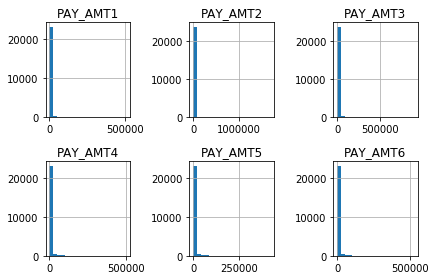

In [40]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

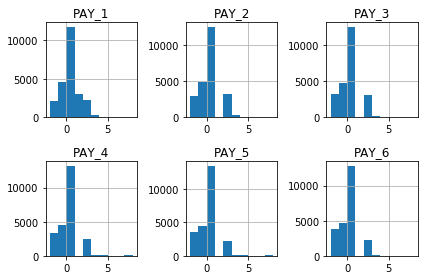

In [41]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

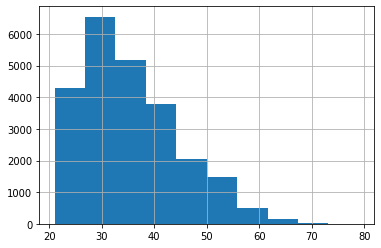

In [42]:
df.AGE.hist()

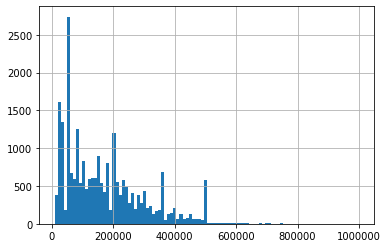

In [43]:
df.LIMIT_BAL.hist(bins = 100)

In [44]:
# DATA CLEANING

In [45]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    11360
1     8443
3     3850
4      347
Name: EDUCATION, dtype: int64

In [46]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    12877
1    10813
3      310
Name: MARRIAGE, dtype: int64

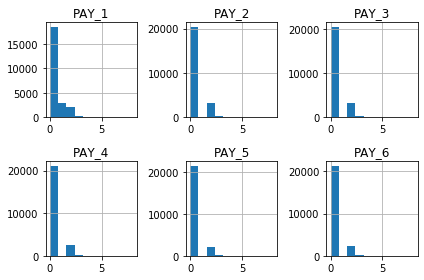

In [47]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [48]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

KeyError: "['def_pay'] not in index"